In [21]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.


In [22]:
img_path = '/home/jagannath/machine_learning_projects/image_recgonition/model/test_images/OD-BG400_20ODDa_8V_20150520191535.jpg'
img = cv2.imread(img_path) # CV read images
img.shape

(951, 634, 3)

### where:
- 951 is row
- 634 is column
- 3 is RGB channel

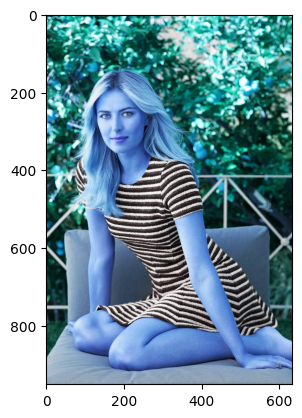

In [23]:
plt.imshow(img)

- It is a colorful image.


In [24]:
# let's convert it into gray

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(951, 634)

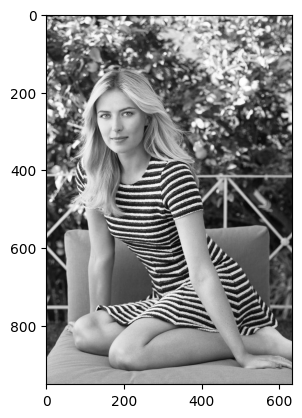

In [25]:
plt.imshow(gray, cmap='gray')

### Now how do you detect face and eyes?


In [26]:
# Load the cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[116, 209, 129, 129]], dtype=int32)

In [27]:
(x,y,w,h) = faces[0]
x,y,w,h

(116, 209, 129, 129)

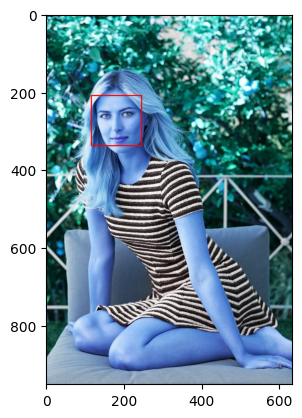

In [28]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

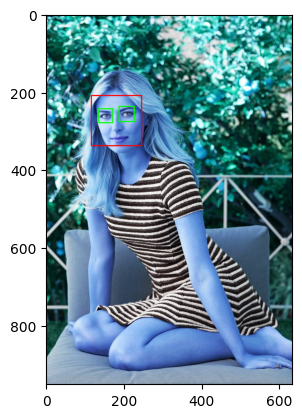

In [29]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

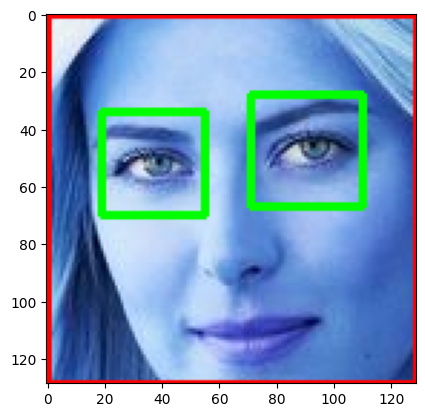

In [30]:
# Gives only the face
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [31]:
# Combining all above step and build a function

def get_cropped_img_if_2_eyes(img_paths):
    img = cv2.imread(img_paths)
    into_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(into_gray, 1.3,5)

    for (x,y,w,h) in faces:
        roi_gray = into_gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >=2:
            return roi_color


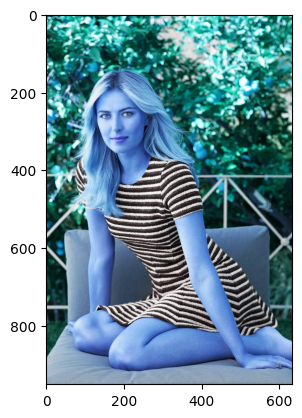

In [32]:
original_img = cv2.imread('/home/jagannath/machine_learning_projects/image_recgonition/model/test_images/OD-BG400_20ODDa_8V_20150520191535.jpg')
plt.imshow(original_img)

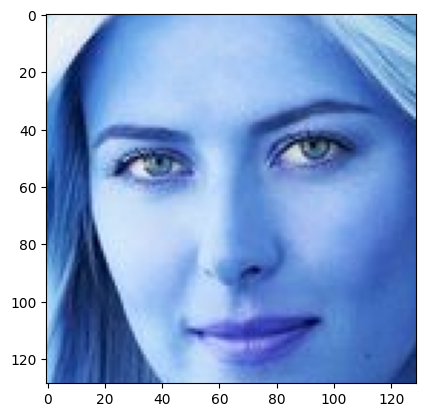

In [33]:
cropped_img = get_cropped_img_if_2_eyes(img_path)
plt.imshow(cropped_img)
# cropped_img

This function only returns if the both eyes are clearly visible, if it detect more than 2 eye it returns nothing.

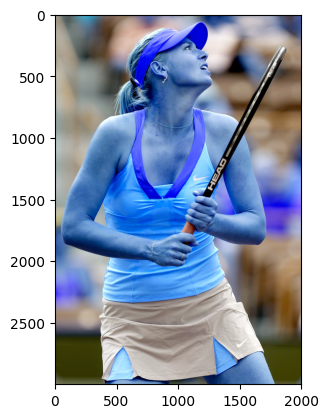

In [34]:
# let's try with other images

path2 = '/home/jagannath/machine_learning_projects/image_recgonition/images_dataset/maria_sharapova/3-681.jpg'

img_1 = cv2.imread(path2)
plt.imshow(img_1)

Above images doesn't shows both eye clearly, let's pass this image to the function and see what happens

In [35]:
cropped_image_no_2_eyes = get_cropped_img_if_2_eyes(path2)
cropped_image_no_2_eyes

Like i said, it doesn't return any value since the figure has no both eyes

In [36]:
# Create cropped folder to store cropped images

path_to_data = "../images_dataset/"
path_to_cr_data = "../images_dataset/cropped/"

In [37]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [38]:
# path of individual folders for each of these players
img_dirs


['../images_dataset/maria_sharapova',
 '../images_dataset/lionel_messi',
 '../images_dataset/virat_kohli',
 '../images_dataset/roger_federer',
 '../images_dataset/serena_williams']

In [39]:
# Creating cropped folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [40]:
# iterate each of above individual player's folder
cropped_img_dirs = []

celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celcbrity_name = img_dir.split('/')[-1] # it splits the celebrity folder, returns last index i.e cele name and store it into celebrity_name
    print(celcbrity_name)

    # create dictionary of celebrity, keys are the celebrity name and values are storedin the form of images
    celebrity_file_name_dict[celcbrity_name] = []


    # iternate into img_dir
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)

        # if get_cropped_img_if_2_eyes function is none it returns nothing but if not none store individual player's folder into  cropped folder.
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celcbrity_name
            # incase the cropped_folder doesn't exist
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            # store each images in the form of celebrity_name1.png,celebrity_name2.png and so on. 
            cropped_file_name = celcbrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celcbrity_name].append(cropped_file_path)
            count += 1    



maria_sharapova
Generating cropped images in folder:  ../images_dataset/cropped/maria_sharapova
lionel_messi
Generating cropped images in folder:  ../images_dataset/cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  ../images_dataset/cropped/virat_kohli
roger_federer
Generating cropped images in folder:  ../images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ../images_dataset/cropped/serena_williams


### Manually examine cropped folder and delete any unwanted images


In [62]:
# celebrity_file_names_dict = {}
# for img_dir in cropped_folder:
#     celebrity_name = img_dir.split('/')[-1]
#     file_list = []
#     for entry in os.scandir(img_dir):
#         file_list.append(entry.path)
#     celebrity_file_names_dict[celebrity_name] = file_list
# celebrity_file_names_dict



## Preprocessing: Use wavelet transform as a feature for traning our model

- In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


### Wavelet transform


In [63]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

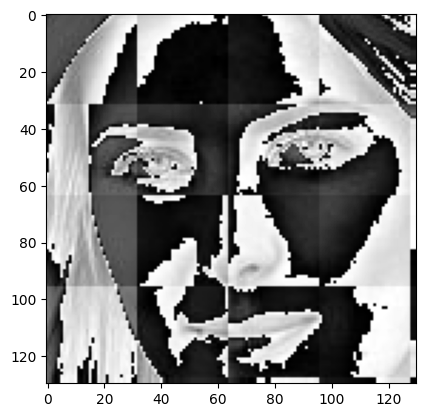

In [64]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [65]:
# Running above dictionary
# It contains keys: player name and values: list of the cropped image of each player
celebrity_file_name_dict

{'maria_sharapova': ['../images_dataset/cropped/maria_sharapova/maria_sharapova1.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova2.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova3.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova4.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova5.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova6.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova7.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova8.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova9.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova10.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova11.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova12.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova13.png',
  '../images_dataset/cropped/maria_sharapova/maria_sharapova14.png',
  '../images_dataset/cro

In [66]:
class_dict = {}
count = 0
for cele_name in celebrity_file_name_dict.keys():
    class_dict[cele_name] = count
    count += 1

class_dict

{'maria_sharapova': 0,
 'lionel_messi': 1,
 'virat_kohli': 2,
 'roger_federer': 3,
 'serena_williams': 4}

In [67]:
# for model training
x = []
y = []

for cele_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        # I have manually deleted some blurr img so i used condition to continue

        if img is None:
            continue

        # Scaling different shape of image into same size 
        scalled_raw_image = cv2.resize(img, (32,32))

        im_har = w2d(cropped_img, 'db1', 5)
        scalled_im_har = cv2.resize(im_har, (32,32))

        # vertical stack the image using numpy
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_im_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[cele_name])

        


[ WARN:0@805.684] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/maria_sharapova/maria_sharapova4.png'): can't open/read file: check file path/integrity
[ WARN:0@805.813] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/maria_sharapova/maria_sharapova19.png'): can't open/read file: check file path/integrity
[ WARN:0@806.031] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/lionel_messi/lionel_messi9.png'): can't open/read file: check file path/integrity
[ WARN:0@806.184] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/lionel_messi/lionel_messi16.png'): can't open/read file: check file path/integrity
[ WARN:0@806.297] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/lionel_messi/lionel_messi26.png'): can't open/read file: check file path/integrity
[ WARN:0@806.360] global loadsave.cpp:248 findDecoder imread_('../images_dataset/cropped/virat_kohli/virat_kohli2.png'): can't ope

In [68]:
len(x)

166

In [69]:
 # 32*32*3 + 32*32


len(x[0])

4096

In [70]:
x[0]

array([[251],
       [241],
       [231],
       ...,
       [232],
       [217],
       [173]], dtype=uint8)

In [71]:
# float avoid warnig so we convert out x train into float

x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(166, 4096)

In [72]:
x[0]

array([251., 241., 231., ..., 232., 217., 173.])

## Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning
<br>
Let'a Try and build a module for our model, first i will try with svm

In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [77]:
pipe.score(X_test, y_test)

0.8333333333333334

In [78]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.90      0.90      0.90        10
           2       0.78      0.78      0.78         9
           3       1.00      0.88      0.93         8
           4       0.89      0.89      0.89         9

    accuracy                           0.83        42
   macro avg       0.83      0.82      0.82        42
weighted avg       0.84      0.83      0.84        42



## Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters


In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [80]:
# Let's build different models to check which model is performing well.

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [81]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/jagannath/machine_learning_projects/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jagannath/machine_learning_projects/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jagannath/machine_learning_projects/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/jagannath/machine_learning_proj

,model,best_score,best_params
0,svm,0.895667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.725667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.887667,{'logisticregression__C': 1}


### It seems like our svm model is performing really well, logistic_regression came very close to SVM

In [83]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [87]:
best_estimators['svm'].score(X_test, y_test)

0.8571428571428571

In [88]:
best_estimators['random_forest'].score(X_test, y_test)

0.6428571428571429

In [89]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8571428571428571

### svm, logistic_regression both are doing great, but i will go with logistic_regression

In [91]:
best_clf = best_estimators['logistic_regression']


In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[5, 0, 1, 0, 0],
       [0, 9, 1, 0, 0],
       [2, 0, 7, 0, 0],
       [1, 0, 0, 7, 0],
       [1, 0, 0, 0, 8]])

Text(95.72222222222221, 0.5, 'Truth')

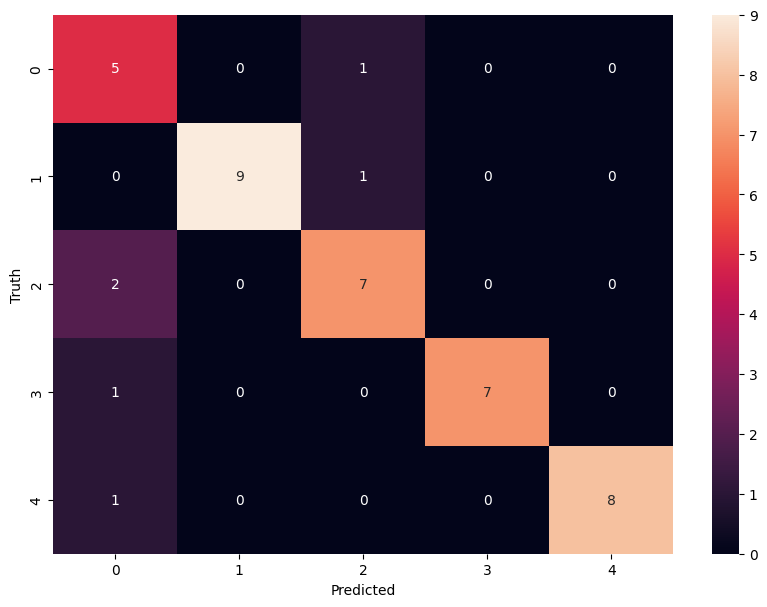

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

`Lionel messi (0)` -> So 5 times out of 42 test sample it was lionel messi and it predicted it to be lionel messi, It made some mistake in class 2, 3, 4.

In [94]:
class_dict


{'maria_sharapova': 0,
 'lionel_messi': 1,
 'virat_kohli': 2,
 'roger_federer': 3,
 'serena_williams': 4}

## Save the trained model


In [98]:
# lets save the model

import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## Save class dictionary


In [99]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))